# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

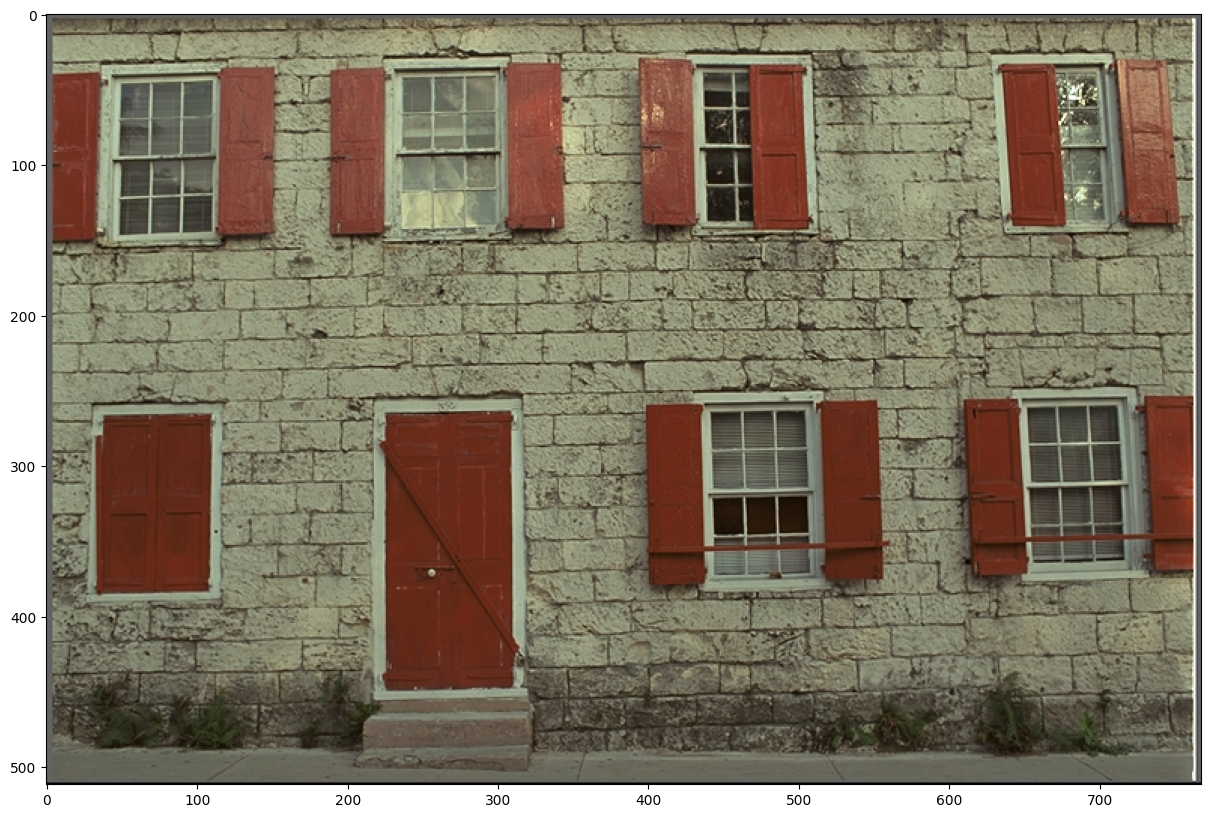

In [2]:
img = cv2.imread('../data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

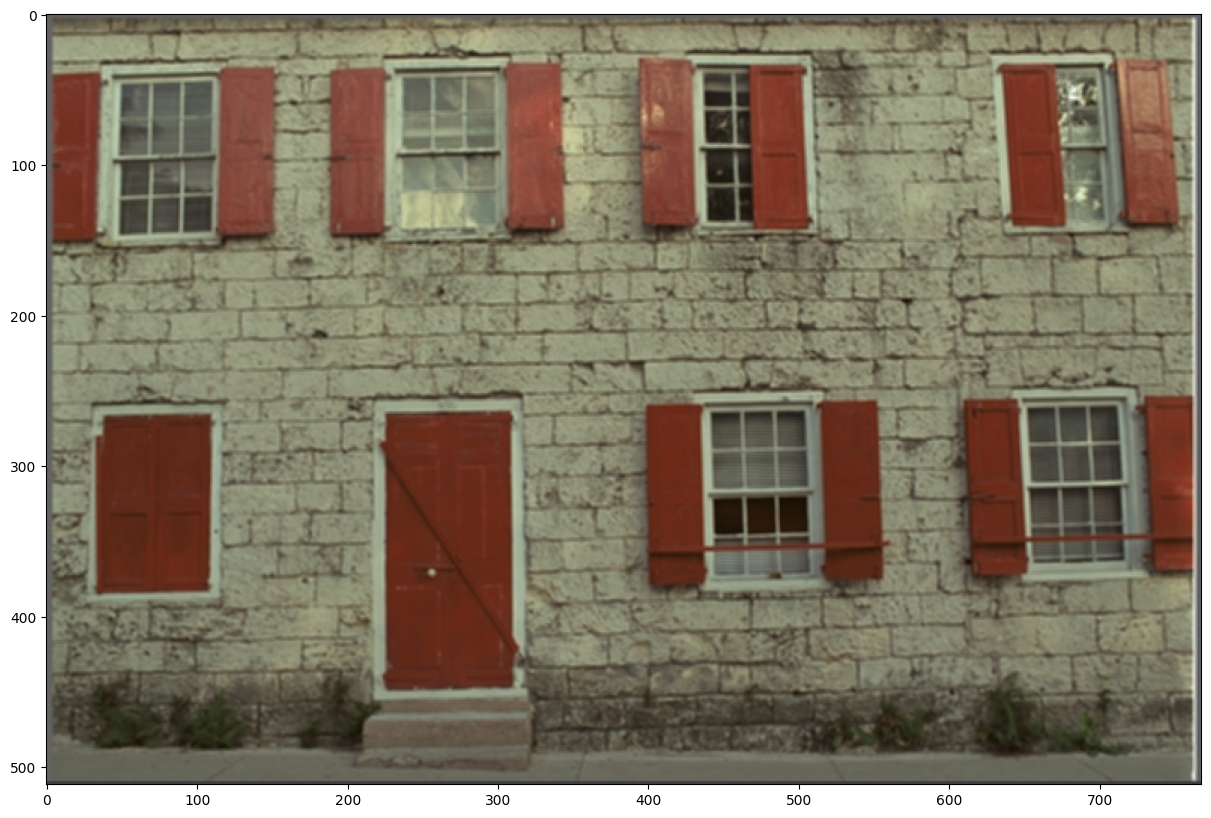

In [11]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img,(3,3),4)
plt.imshow(unsharp)

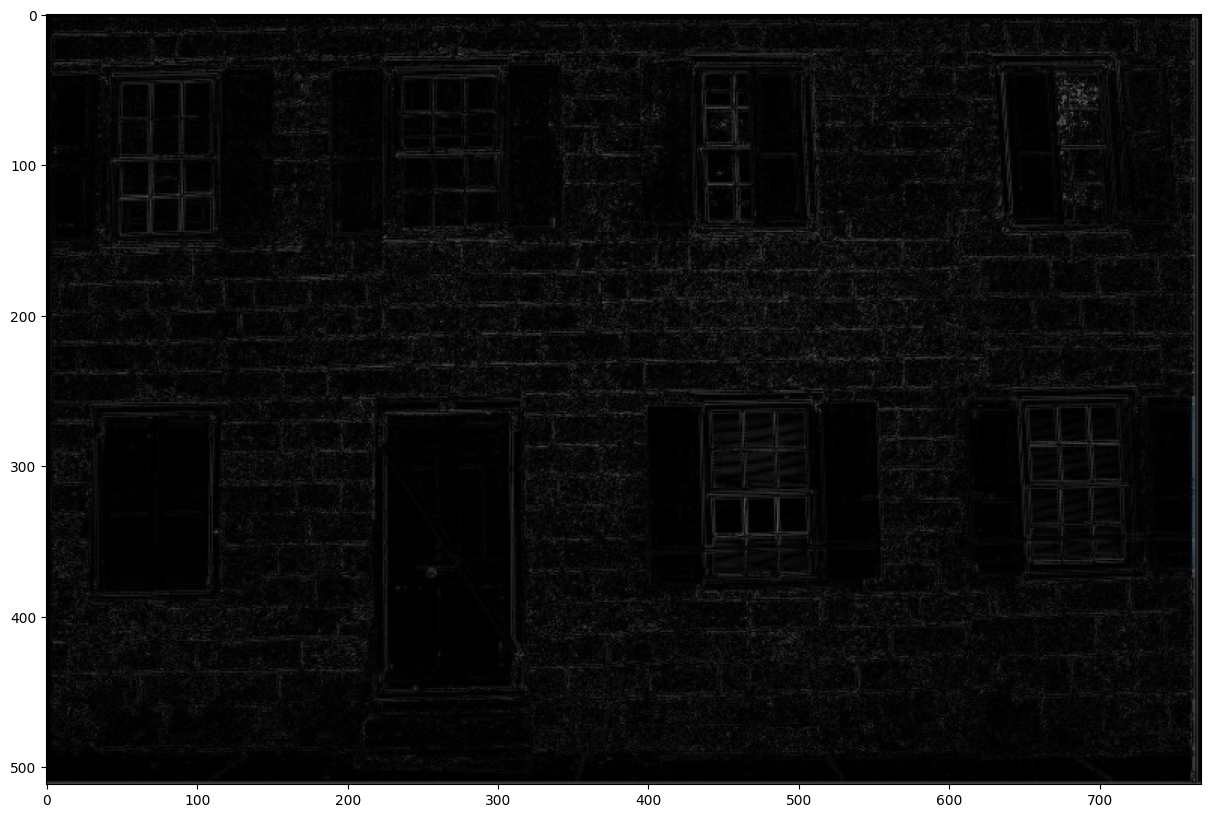

In [12]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = cv2.absdiff(img,unsharp)
plt.imshow(diff)

Text(0.5, 1.0, 'USM 5')

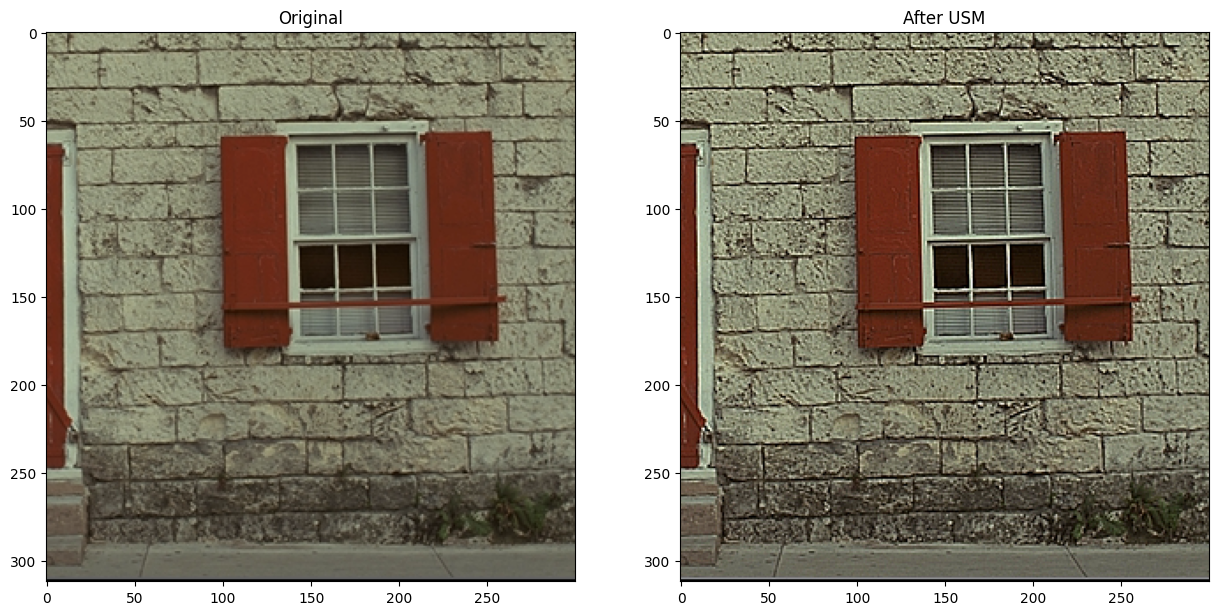

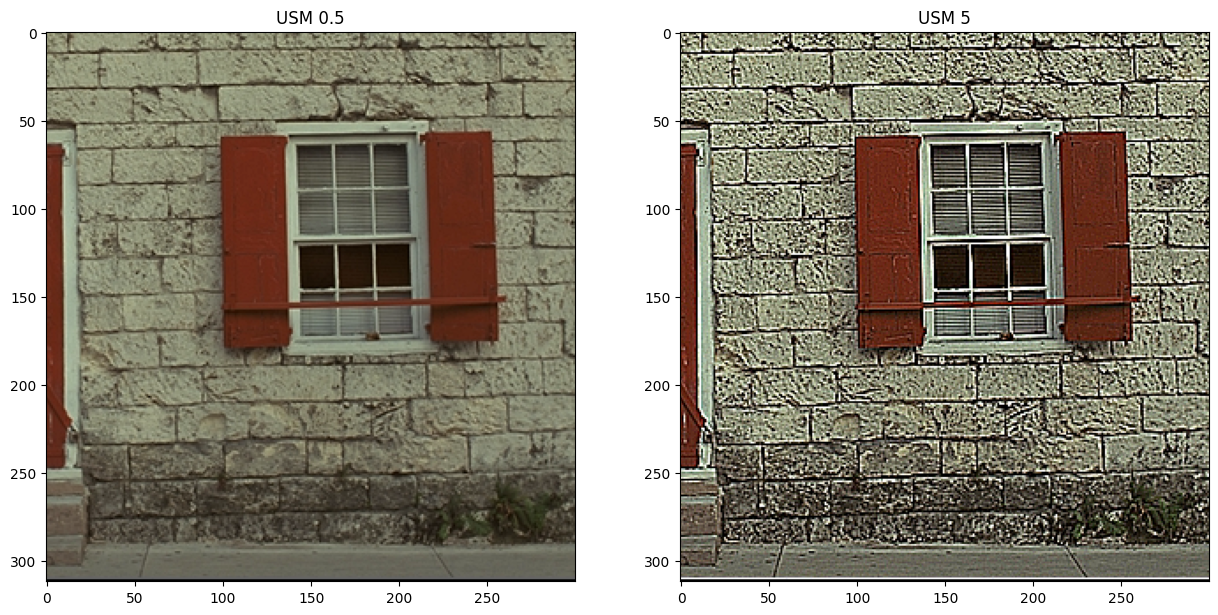

In [17]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
def unsharp_mask(original, unsharp, amount):
    original_float = original.astype(np.float32)
    unsharp_float = unsharp.astype(np.float32)
    sharpened_float = original_float + (original_float - unsharp_float) * amount
    usp = np.clip(sharpened_float, 0, 255)
    usp = usp.astype(np.uint8)
    return usp
sharpened = unsharp_mask(img, unsharp, 1.5)
small_sharpened = unsharp_mask(img, unsharp, 0.1)
large_sharpened = unsharp_mask(img, unsharp, 5)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img[200:600, 300:600, :])
ax1.set_title('Original')
ax2.imshow(sharpened[200:600, 300:600, :])
ax2.set_title('After USM')
fig1, (ax3, ax4) = plt.subplots(1, 2)
ax3.imshow(small_sharpened[200:600, 300:600, :])
ax3.set_title('USM 0.5')
ax4.imshow(large_sharpened[200:600, 300:600, :])
ax4.set_title('USM 5')

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

### Answers


* Good practice is to use a conservative amount, like 1.0 - 1.5
* If the amount is too small, you get little change
* If the amount is too large, you get too much noise
